In [1]:
# import numpy as np
# from sklearn.preprocessing import Imputer

# ratings = data['review_scores_rating']
# imp = Imputer(missing_values=np.nan, strategy='mean', axis=1)
# ratings = np.array(ratings).reshape(1, -1)
# imp.fit(ratings)
# ratings = imp.transform(ratings)
# ratings.shape
# sample_idxs = np.random.randint(ratings.shape[1], size=1000)
# sample_idxs
# np.take(ratings, sample_idxs)

In [2]:
# import math
# import matplotlib.pyplot as plt
# plt.hist(np.take(ratings, sample_idxs))
# len(data.columns)
# len(data.sample(1).values[0])
# for k, v in zip(data.columns, data.sample(1).values[0]): print k + ': ' + str(v)

In [3]:
import pandas as pd

In [4]:
all_data = pd.read_csv('./data/review_features.csv', low_memory=False)

In [5]:
data = all_data.sample(20000, random_state=1234)
cols_to_drop = ['access', 'amenities_', 'description', \
               'house_rules', 'id', 'host_verifications', 'last_review', 'last_scraped', \
               'market', 'neighborhood_overview', 'neighbourhood', 'neighbourhood_cleansed', \
               'neighbourhood_group_cleansed', 'notes', 'street', 'summary', 'transit', \
               'Unnamed: 0', 'first_review', 'calendar_last_scraped', 'calendar_updated', 
               'review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', \
                'review_scores_communication', 'review_scores_location']
data.loc[:, cols_to_drop]
data = data.drop(cols_to_drop, axis=1)

data = data.replace('f', 0)
data = data.replace('t', 1)
data = data.replace(r'[\$,]','', regex=True)
# data['review_scores_rating']


# Get a list of non-numeric columns so we can drop them
from collections import defaultdict

non_numeric_columns = defaultdict(int)

for d in data.values:
    for k, v in zip(data.columns, d):
        if 'Mission' == v:
            print k, v
        
        try: 
            float(v)
        except Exception as e:
            non_numeric_columns[k] += 1

print non_numeric_columns.keys()
data = data.drop(non_numeric_columns.keys(), axis=1)

['bathrooms', 'host_has_profile_pic', 'cancellation_policy', 'host_neighbourhood', 'host_acceptance_rate', 'property_type', 'host_location', 'space', 'zipcode', 'host_since', 'host_listings_count', 'bedrooms', 'host_response_rate', 'host_about', 'calculated_host_listings_count', 'interaction', 'name', 'license', 'host_response_time', 'beds', 'cleaning_fee', 'host_name', 'guests_included', 'host_total_listings_count']


In [6]:
review_columns = defaultdict(int)
for c in data.columns:
    if 'review' in c:
        review_columns[c] += 1
review_columns.keys()

['reviews_per_month',
 'number_of_reviews',
 'review_scores_value',
 'review_scores_rating']

In [7]:
dependent_variable = 'review_scores_rating'

In [8]:
# Drop missing values from depedent variable
data = data.dropna(subset=[dependent_variable])

In [9]:
y = data[dependent_variable]
X = data.drop(review_columns.keys(), axis=1)

In [10]:
for c in X.columns:
    if 'review' in c:
        print c

In [11]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=1234)

In [12]:
import numpy as np
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=np.nan, strategy='median', axis=1)
imp.fit(X_train)
X_train = imp.transform(X_train)

imp = Imputer(missing_values=np.nan, strategy='median', axis=1)
imp.fit(X_test)
X_test = imp.transform(X_test)

In [13]:
y_train = np.array(y_train).reshape(1, -1)
imp = Imputer(missing_values=np.nan, strategy='median', axis=1)
imp.fit(y_train)
y_train = imp.transform(y_train)
# y_train = y_train.reshape(-1, 1)
y_train = y_train.ravel()

y_test = np.array(y_test).reshape(1, -1)
imp = Imputer(missing_values=np.nan, strategy='median', axis=1)
imp.fit(y_test)
y_test = imp.transform(y_test)
# y_test = y_test.reshape(-1, 1)
y_test = y_test.ravel()

In [14]:
print X_train.shape
print y_train.ravel().shape

(10464, 228)
(10464,)


Mean squared error: 54.21
Variance score: 0.02


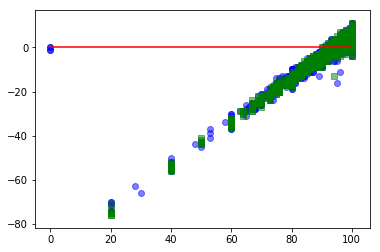

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, make_scorer, roc_auc_score

# Create linear regression object
regr = linear_model.Lasso()

# Train the model using the training sets
regr.fit(X_train, y_train)

y_train_pred = map(lambda x: round(x, 0), regr.predict(X_train))

# Make predictions using the testing set
y_pred = map(lambda x: round(x, 0), regr.predict(X_test))

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot the residuals
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=100, color='r')
plt.show()

In [16]:
# MSE without dropping nan from predictor
# Mean squared error: 47.72
# Variance score: 0.08


Mean squared error: 0.01
Variance score: -0.00


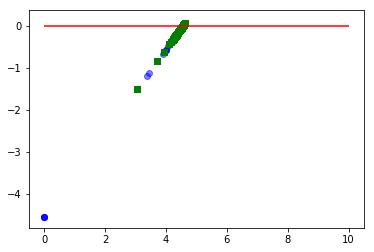

In [66]:
import math

# Create linear regression object
regr = linear_model.ElasticNet(normalize=True, alpha=0.05, fit_intercept=True)

y_traint = np.array(map(lambda x: math.log(x+1), y_train))
y_testt = np.array(map(lambda x: math.log(x+1), y_test))

# Train the model using the training sets
regr.fit(X_train, y_traint)



y_train_pred = map(lambda x: round(x, 8), regr.predict(X_train))

# Make predictions using the testing set
y_pred = map(lambda x: round(x, 8), regr.predict(X_test))

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_testt, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_testt, y_pred))

# Plot the residuals
plt.scatter(y_traint, y_traint-y_train_pred, c='b', marker='o', alpha=0.5)
plt.scatter(y_testt, y_testt-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=10, color='r')
plt.show()

In [104]:
print np.min(y_test)
print np.max(y_test)

20.0
100.0


In [105]:
print np.min(y_train)
print np.max(y_train)

0.0
100.0


Mean squared error: 3212847152917198667776.00
Variance score: -57789026316663816192.00


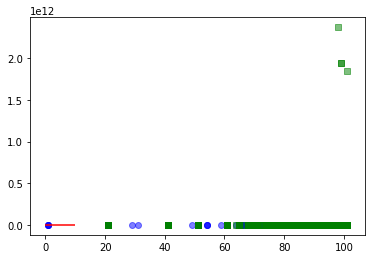

In [101]:
import math

# Create linear regression object
# regr = linear_model.ElasticNet(normalize=True, alpha=0.05, fit_intercept=True)

# y_traint = np.array(map(lambda x: math.log(x+1), y_train))
# y_testt = np.array(map(lambda x: math.log(x+1), y_test))

y_traint = np.array(map(lambda x: x+1, y_train))
y_traint_var = np.var(y_traint)
y_traint_weights = np.array(map(lambda x: (x/y_traint_var), y_traint))

y_testt = np.array(map(lambda x: x+1, y_test))
y_testt_var = np.var(y_testt)
y_testt_weights = np.array(map(lambda x: (x/y_testt_var), y_testt))


regr = linear_model.LinearRegression(fit_intercept=True, normalize=True)


# Train the model using the training sets
regr.fit(X_train, y_traint, sample_weight=y_traint_weights)



y_train_pred = map(lambda x: round(x, 8), regr.predict(X_train))

# Make predictions using the testing set
y_pred = map(lambda x: round(x, 8), regr.predict(X_test))

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_testt, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_testt, y_pred))

# Plot the residuals
plt.scatter(y_traint, y_traint-y_train_pred, c='b', marker='o', alpha=0.5)
plt.scatter(y_testt, y_testt-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=10, color='r')
plt.show()

In [ ]:
#  The bias and heteroscadasticity is epic in the redisual plot
# Let's transform the dependent variable


In [17]:
for i, j in zip(y_test[:20], y_pred[:20]): print i, j

100.0 98.0
96.0 94.0
100.0 95.0
98.0 96.0
81.0 96.0
98.0 94.0
98.0 96.0
96.0 94.0
95.0 94.0
98.0 97.0
98.0 95.0
100.0 97.0
93.0 94.0
100.0 93.0
96.0 96.0
99.0 94.0
94.0 93.0
90.0 94.0
97.0 96.0
90.0 93.0


In [18]:
# With imputing by mean
# Mean squared error: 18099081.99
# Variance score: -371456.56

In [27]:
from sklearn import neural_network

# Create neural net object
nn = neural_network.MLPRegressor(alpha=0.7, warm_start=False, activation='logistic', \
                                learning_rate='invscaling', solver='sgd', max_iter=1000)

# Train the model using the training sets
nn.fit(X_train, y_train)

y_train_pred = map(lambda x: round(x, 0), nn.predict(X_train))

# Make predictions using the testing set
y_pred = map(lambda x: round(x, 0), nn.predict(X_test))

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.tolist(), y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.tolist(), y_pred))


Mean squared error: 55.91
Variance score: -0.01


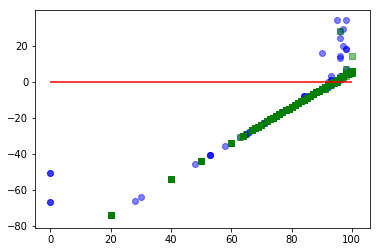

In [31]:
# Plot the residuals
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=100, color='r')
plt.show()

In [20]:
for i, j in zip(y_test[:20], y_pred[:20]): print i, j

100.0 94.0
96.0 94.0
100.0 94.0
98.0 94.0
81.0 94.0
98.0 94.0
98.0 94.0
96.0 94.0
95.0 94.0
98.0 94.0
98.0 94.0
100.0 94.0
93.0 94.0
100.0 94.0
96.0 94.0
99.0 94.0
94.0 94.0
90.0 94.0
97.0 94.0
90.0 94.0
